<a href="https://colab.research.google.com/github/MuradovMaks/Parkinson_Classification_XGBoost/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B7%D0%BD%D0%B8%20%D0%BF%D0%B0%D1%80%D0%BA%D0%B8%D0%BD%D1%81%D0%BE%D0%BD%D0%B0%20%D0%BD%D0%B0%20%D1%80%D0%B0%D0%BD%D0%BD%D0%B5%D0%B9%20%D1%81%D1%82%D0%B0%D0%B4%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация болезни паркинсона на ранней стадии

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get

In [ ]:
data = get('https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data')

In [ ]:
with open('parkinsons.data','wb') as f:
  f.write(data.content)

In [ ]:
df = pd.read_csv('parkinsons.data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df[(df['status'] == 1)].head(4)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


<Axes: >

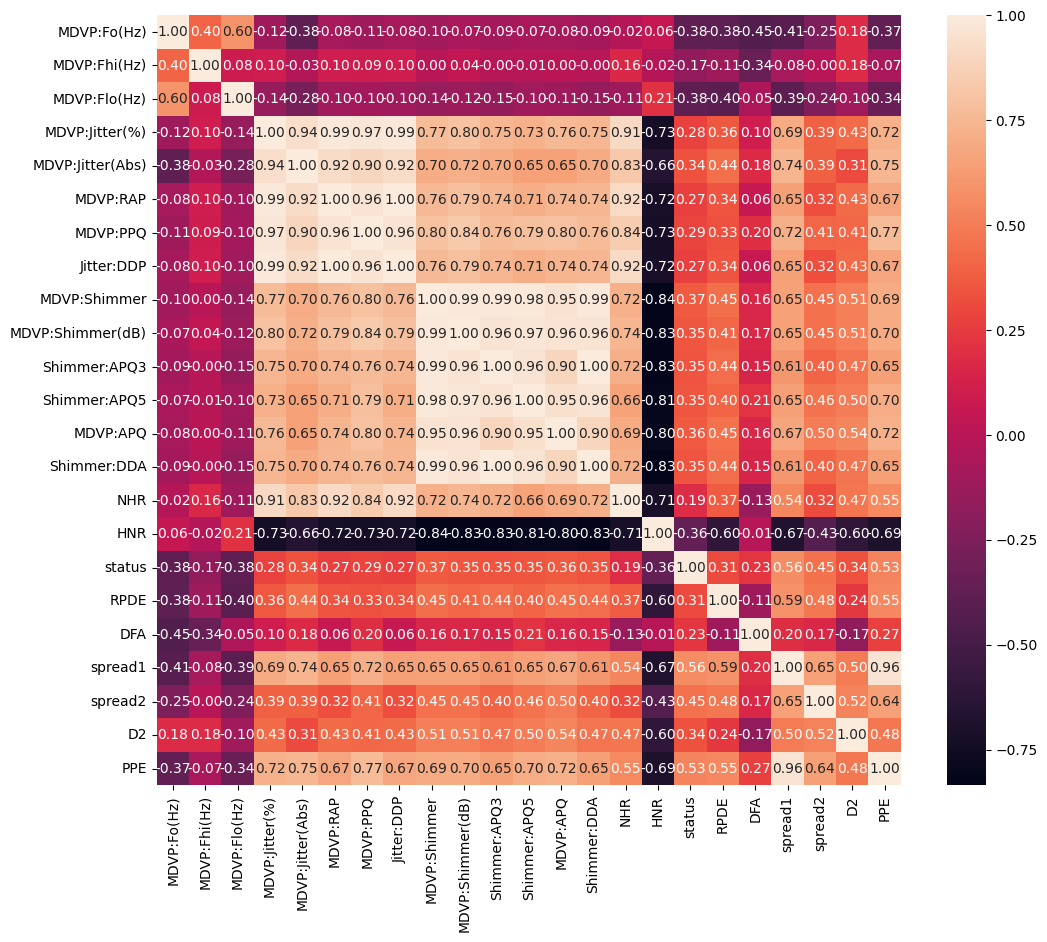

In [ ]:
df_without_name = df.drop(columns=['name'])
corr_matrix = df_without_name.corr()
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

# По данной тепловой карте мы видим, что со статусом (0 -здоровый , 1-больной) больше всего коррелируют:
1.Spread1,2
2.HNR,
3.PPE,
4.MDVP:FO(hz),
5.MDVP:Fhi(hz),
6.MDVP:FLO(hz),
7.MDVP:shimmer,
8.MDVP:Apq

<ipython-input-7-b7a6e4c7a2ec>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Здоровый человек', 'Имеет болезнь паркинсона'])


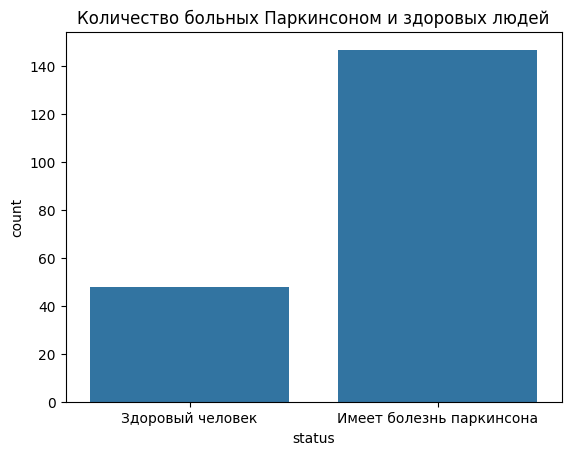

In [ ]:
sns.countplot(x=df['status'],)
plt.title("Количество больных Паркинсоном и здоровых людей")
plt.gca().set_xticklabels(['Здоровый человек', 'Имеет болезнь паркинсона'])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
df_data = df[['HNR','MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','spread1','spread2','PPE','MDVP:Shimmer','MDVP:APQ']]
df_data.head(5)


,HNR,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),spread1,spread2,PPE,MDVP:Shimmer,MDVP:APQ
0,21.033,119.992,157.302,74.997,-4.813031,0.266482,0.284654,0.04374,0.02971
1,19.085,122.400,148.650,113.819,-4.075192,0.335590,0.368674,0.06134,0.04368
2,20.651,116.682,131.111,111.555,-4.443179,0.311173,0.332634,0.05233,0.03590
3,20.644,116.676,137.871,111.366,-4.117501,0.334147,0.368975,0.05492,0.03772
4,19.649,116.014,141.781,110.655,-3.747787,0.234513,0.410335,0.06425,0.04465


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_data,df['status'],test_size=0.2,random_state=7)


In [ ]:
print(x_train.shape[0], len(y_train))
print(x_test.shape[0], len(y_test))

156 156
39 39


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(base_score=0.5, booster='gbtree')
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Точность : {round(accuracy*100,2)} %')

Точность : 97.44 %
